In [1]:
import pandas as pd
import matplotlib.pyplot as plt

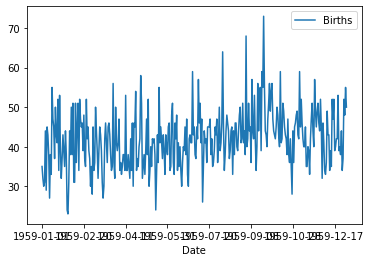

In [2]:
series_df = pd.read_csv('data/daily-total-female-births.csv',
                        header=0,
                        index_col=0)
series_df.plot()
plt.show()

In [9]:
series_x = series_df.values.astype('float32')
train_x, test_x = series_x[:len(series_x)-1], series_x[len(series_x)-1:]

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
# Train the ARIMA model, which is not the optimal model for this problem.
# It is effective for the intuition behind prediction intervals

model = ARIMA(train_x, order=(5, 1, 1))
model_fit = model.fit(disp=False)
forecast, stderr, conf = model_fit.forecast()

In [17]:
print('Expected: %.3f' % test_x[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: 6.996' % stderr)
print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 50.000
Forecast: 45.878
Standard Error: 6.996
95% Prediction Interval: 32.167 to 59.590


In [18]:
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
    forecast, stderr, conf = model_fit.forecast(alpha=a)
    print('%.1f%% Prediction Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, conf[0][0], conf[0][1]))

80.0% Prediction Interval: 45.878 between 36.913 and 54.844
90.0% Prediction Interval: 45.878 between 34.371 and 57.386
95.0% Prediction Interval: 45.878 between 32.167 and 59.590
99.0% Prediction Interval: 45.878 between 27.858 and 63.898


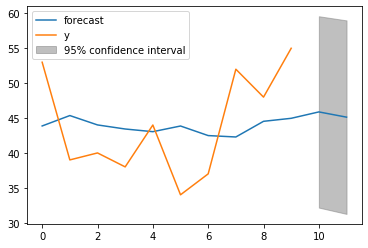

In [21]:
model_fit.plot_predict(len(train_x)-10, len(train_x)+1)
plt.show()